## CNN Classifier (Mask, No Mask, Incorrectly wearing Mask)

### Import Packages

In [3]:
# Import Libraries 
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
import sklearn
from sklearn.model_selection import train_test_split
import cv2

import seaborn as sns
import pickle
import os

### Load in the dataset that was preprocessed from local directory

In [4]:
# Load in the files  

filename = 'X.pickle'
pickle_in = open(filename, 'rb')
X = pickle.load(pickle_in)

filename = 'y.pickle'
pickle_in = open(filename, 'rb')
y = pickle.load(pickle_in)

CATEGORIES = ['Without Mask', 'Incorrectly Wearing Mask', 'Wearing Mask']

In [7]:
# double check to see the types of the loaded files
print('Type of X:', type(X))
print('Type of y:', type(y))

Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>


In [8]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (15737, 64, 64)
Shape of y: (15737,)


In [9]:
# print one example of dataset
print('X:')
print(X[13])
print('y:')
print(y[13])

X:
[[158 184 188 ...  44  88 155]
 [144 166 190 ...  57  79 153]
 [141 151 175 ...  56  88 149]
 ...
 [ 97  97  90 ...  87  77  79]
 [ 98  99  93 ...  80  84  88]
 [ 99  96  90 ...  66  84  83]]
y:
0


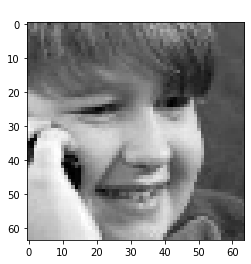

In [10]:
# Display the one example
plt.imshow(X[10], cmap='gray')
plt.title(CATEGORIES[y[10]], color='white')
print('')

#### EDA

In [11]:
resized_X = []
for img in X:
    resized_X.append(cv2.resize(img, (64, 64)))

In [12]:
X = np.asarray(resized_X)
X = X.reshape(-1, 64, 64, 1)
print(X.shape)

(15737, 64, 64, 1)


In [13]:
# normalize the pixel values
X = X / 255.0

In [14]:
IMG_DIM = X.shape[1]
print('IMG_DIM:',IMG_DIM)

IMG_DIM: 64


In [15]:
# Split dataset into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
print('Training Size:', len(X_train))
print('Testing  Size:', len(X_test))

Training Size: 12589
Testing  Size: 3148


#### Building and fitting the CNN Model 

In [17]:
cnn_model = tensorflow.keras.models.Sequential()

In [18]:
# Start of Convolution Layers & Maxpooling
cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(IMG_DIM, IMG_DIM, 1)))
cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(tensorflow.keras.layers.MaxPool2D())

cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(tensorflow.keras.layers.MaxPool2D())

cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(IMG_DIM, IMG_DIM, 1)))
cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(tensorflow.keras.layers.MaxPool2D())

# Start of Neural Nets
cnn_model.add(tensorflow.keras.layers.Flatten())

cnn_model.add(tensorflow.keras.layers.Dense(512, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Dropout(0.3))
cnn_model.add(tensorflow.keras.layers.Dense(512, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Dropout(0.3))
cnn_model.add(tensorflow.keras.layers.Dense(256, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Dense(3, activation='softmax'))

In [19]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                    

In [20]:
# Compile the Model
cnn_model.compile(optimizer=tensorflow.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [21]:
# Train Model
epochs = 10
cnn_model.fit(X_train, y_train, epochs=epochs, validation_split=0.1)

Epoch 1/10
355/355 [==============================] - 134s 366ms/step - loss: 0.3502 - acc: 0.8425 - val_loss: 0.1521 - val_acc: 0.9500
Epoch 2/10
355/355 [==============================] - 154s 433ms/step - loss: 0.0897 - acc: 0.9702 - val_loss: 0.0440 - val_acc: 0.9889
Epoch 3/10
355/355 [==============================] - 149s 419ms/step - loss: 0.0592 - acc: 0.9811 - val_loss: 0.0456 - val_acc: 0.9849
Epoch 4/10
355/355 [==============================] - 154s 433ms/step - loss: 0.0565 - acc: 0.9814 - val_loss: 0.0471 - val_acc: 0.9873
Epoch 5/10
355/355 [==============================] - 145s 409ms/step - loss: 0.0485 - acc: 0.9846 - val_loss: 0.0526 - val_acc: 0.9833
Epoch 6/10
355/355 [==============================] - 138s 388ms/step - loss: 0.0360 - acc: 0.9887 - val_loss: 0.0315 - val_acc: 0.9897
Epoch 7/10
355/355 [==============================] - 137s 387ms/step - loss: 0.0441 - acc: 0.9852 - val_loss: 0.0396 - val_acc: 0.9881
Epoch 8/10
355/355 [============================

#### Evalute Performance

In [22]:
# Evaluate performance
cnn_model.evaluate(X_test, y_test)

99/99 [==============================] - 8s 79ms/step - loss: 0.0716 - acc: 0.9736


[0.07157361507415771, 0.9736340641975403]

In [23]:
y_pred = np.argmax(cnn_model.predict(X_test), axis=-1)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       983
           1       0.98      1.00      0.99      1177
           2       0.98      0.93      0.96       988

    accuracy                           0.97      3148
   macro avg       0.97      0.97      0.97      3148
weighted avg       0.97      0.97      0.97      3148



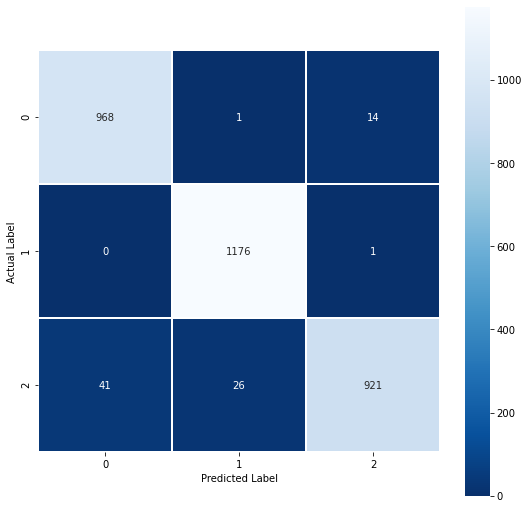

In [24]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt='.0f', square=True, linewidths=.5, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(sklearn.metrics.classification_report(y_test, y_pred))

#### Save model for future use

In [25]:
path = './cnn'
cnn_model.save(path)

# To load
# model = tensorflow.keras.models.load_model(path)

INFO:tensorflow:Assets written to: ./cnn\assets
